# 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import and analyze data

In [2]:
# Define path
path = r'/Users/elisabetta/Documents/12-2022 Instacart Basket Analysis'

In [3]:
# Import latest file
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Check output
df_ords_prods_custs.shape

(32404854, 24)

In [5]:
df_ords_prods_custs.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,price,...,spend_flag,frequency_flag,first_name,second_name,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Low spender,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


Text(0, 0.5, 'number of orders')

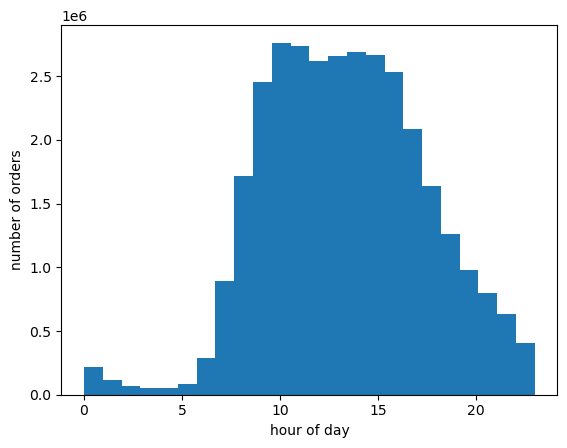

In [32]:
# STEP 3 Create histogram showing order_hour_of_day
hist_hour_of_day = df_ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel('hour of day')
plt.ylabel('number of orders')

In [6]:
# STEP 3 The histogram shows that during the night (midnight to 6 am) there a the fewest orders. The orders start to pick up gradually after that, reaching a peak at 10 am and staying stable till 3 pm. Orders start to decline after that and continue a downward trend for the whole evening, reaching a minimum between 11 pm and midnight

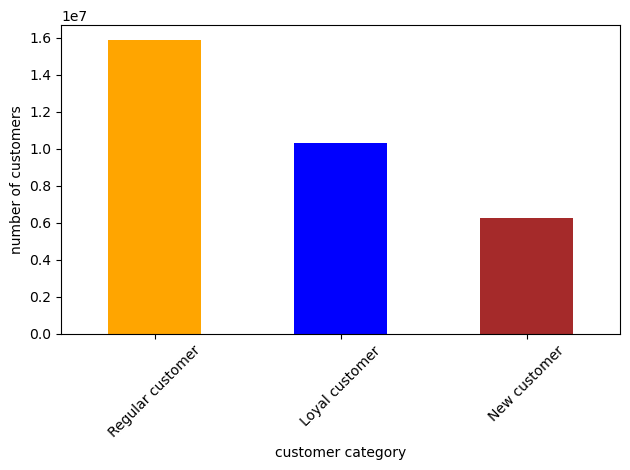

In [50]:
# STEP 4 Create bar chart using loyalty flag
bar_loyalty = df_ords_prods_custs['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'blue', 'brown'])
plt.xlabel('customer category')
plt.ylabel('number of customers')
plt.xticks (rotation = 45)
plt.tight_layout()

In [35]:
# STEP 5 Check spend difference according to hour of day using a line chart

In [36]:
# Create sample because original data set is too large. Therefore create randomized sample 70/30
# First create list flagging rows True/False in dev column
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_custs)) <= 0.7

In [37]:
# Check output
dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
# Store 70% of list in sample_large
sample_large = df_ords_prods_custs[dev]

In [39]:
# Store 30& in sample_small
sample_small = df_ords_prods_custs[~dev]

In [40]:
# Check output
len(df_ords_prods_custs)

32404854

In [41]:
len(sample_large)

22683756

In [42]:
len(sample_small)

9721098

In [43]:
len(sample_large) + len(sample_small)

32404854

In [44]:
# Further reduce dataframe to only columns needed to create line chart
df_small_hour_price = sample_small[['order_hour_of_day', 'price']]

In [45]:
# Check output
df_small_hour_price.shape

(9721098, 2)

In [46]:
df_small_hour_price.head()

,order_hour_of_day,price
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


Text(0, 0.5, 'price')

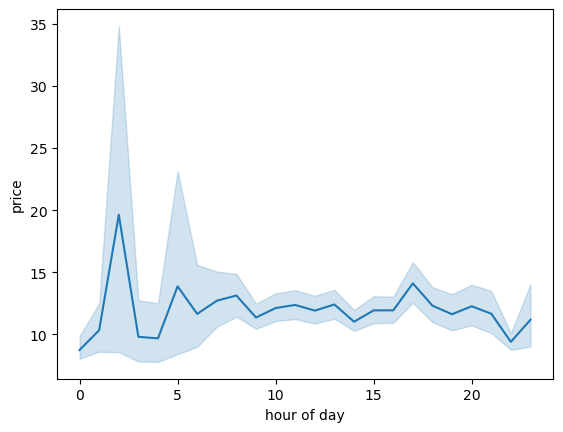

In [47]:
# Create line chart
line_hour_price = sns.lineplot(data = df_small_hour_price, x = 'order_hour_of_day', y = 'price')
plt.xlabel('hour of day')
plt.ylabel('price')

In [48]:
# STEP 5 Interestingly customers seem to spend more during the night even though they make less orders compared to daytime

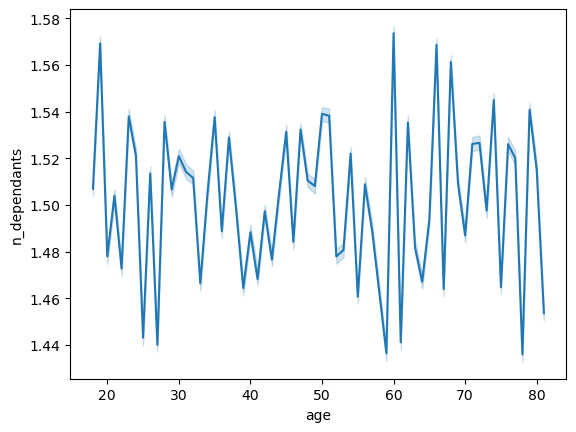

In [31]:
# STEP 6 Create line chart using age and number of dependants
line_age_dependants = sns.lineplot(data = df_ords_prods_custs, x = 'age', y = 'n_dependants')

In [33]:
# STEP 6 From the chart we can see that there is no visible trend connecting age to number of dependants (e.g. you might think that peopele between 30 and 50 have kids at home with them so have more dependants)

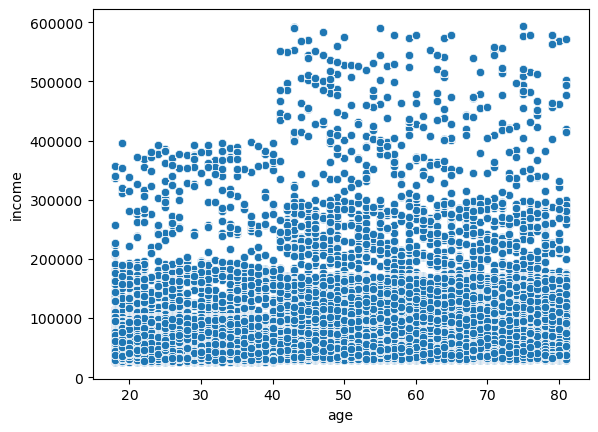

In [34]:
# STEP 7 Analyze connection between age and spending power (income)
# Create scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods_custs)

In [35]:
# STEP 7 From the scatterplot we see that spending power (income) can vary enormously. There can be older people still making little money and younger ones making a lot. However, income above 400000 only shows for people 42 or older. Therefore, we see a mild trend connecting age and income, i.e. as you grow older, you make more money. A higher income is also less frequent after 65, which indicates that pensioners have a lower spending power

# 03. Export visualizations

In [36]:
# STEP 8 Export visualizations as .png files

In [33]:
# Export histogram
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day_4.9.png'))

In [51]:
# Export bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_4.9.png'))

In [49]:
# Export line chart hour of day / price
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_price_4.9.png'))

In [45]:
# Export line chart age / numb dependants
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants_4.9.png'))

In [46]:
# Export scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income_4.9.png'))